In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [2]:
#read data 
loans_2007 = pd.read_csv('LoanStatsCombined.csv')
half_count = len(loans_2007) / 2
loans_2007.head(3)


/Users/hrutubanginwar/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501.0,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,Feb-16,719.0,715.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430.0,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0.0,Apr-99,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,534.0,530.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175.0,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.50%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,Feb-16

In [5]:
loans_2007 = loans_2007.dropna(thresh=half_count,axis=1) # Drop any column with more than 50% missing values
# These columns are not useful for our purposes 

'''
already ran the below
loans_2007 = loans_2007.drop(['url',],axis=1) 
loans_2007 = loans_2007.drop(['desc',],axis=1) 
'''


"\nalready ran the below\nloans_2007 = loans_2007.drop(['url',],axis=1) \nloans_2007 = loans_2007.drop(['desc',],axis=1) \n"

In [6]:
loans_2007.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501.0,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,735.0,739.0,1.0,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,Feb-16,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430.0,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-99,740.0,744.0,5.0,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,534.0,530.0,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175.0,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,735.0,739.0,2.0,2.0,0.0,2956.0,98.50%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,Feb-16,679.0,675.0,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
loans_2007.shape

(887388, 91)

In [8]:
# Loading in the data dictionary
data_dictionary = pd.read_csv('LCDataDictionary_compiled4.4.csv') 
print(data_dictionary.shape[0])
print(data_dictionary.columns.tolist())

193
['LoanStatNew', 'Description']


In [9]:
data_dictionary.head()
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'name', 'Description': 'description'})

In [10]:
loans_2007_dtypes = pd.DataFrame(loans_2007.dtypes,columns=['dtypes'])
loans_2007_dtypes = loans_2007_dtypes.reset_index()
loans_2007_dtypes['name'] = loans_2007_dtypes['index']
loans_2007_dtypes = loans_2007_dtypes[['name','dtypes']]
loans_2007_dtypes['first value'] = loans_2007.loc[0].values
preview = loans_2007_dtypes.merge(data_dictionary, on='name',how='left')

In [11]:
preview.head()


,name,dtypes,first value,description
0,id,float64,1.0775e+06,A unique LC assigned ID for the loan listing.
1,id,float64,1.0775e+06,A unique LC assigned ID for the loan listing.
2,member_id,float64,1.2966e+06,A unique LC assigned Id for the borrower member.
3,loan_amnt,float64,5000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
4,funded_amnt,float64,5000,The total amount committed to that loan at that point in time.


In [12]:
preview[:19]


,name,dtypes,first value,description
0,id,float64,1.0775e+06,A unique LC assigned ID for the loan listing.
1,id,float64,1.0775e+06,A unique LC assigned ID for the loan listing.
2,member_id,float64,1.2966e+06,A unique LC assigned Id for the borrower member.
3,loan_amnt,float64,5000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
4,funded_amnt,float64,5000,The total amount committed to that loan at that point in time.
5,funded_amnt_inv,float64,4975,The total amount committed by investors for that loan at that point in time.
6,term,object,36 months,The number of payments on the loan. Values are in months and can be either 36 or 60.
7,term,object,36 months,The number of payments on the loan. Values are in months and can be either 36 or 60.
8,int_rate,object,10.65%,Interest Rate on the loan
9,installment,float64,162.87,The monthly payment owed by the borrower if the loan originates.


In [13]:
drop_list = ['id','member_id','funded_amnt','funded_amnt_inv',
'int_rate','sub_grade','emp_title','issue_d']
loans_2007 = loans_2007.drop(drop_list,axis=1)

In [14]:
preview[19:38]

,name,dtypes,first value,description
19,verification_status,object,Verified,NaN
20,issue_d,object,Dec-11,The month which the loan was funded
21,loan_status,object,Fully Paid,Current status of the loan
22,pymnt_plan,object,n,Indicates if a payment plan has been put in place for the loan
23,purpose,object,credit_card,A category provided by the borrower for the loan request.
24,purpose,object,credit_card,A category provided by the borrower for the loan request.
25,title,object,Computer,The loan title provided by the borrower
26,title,object,Computer,The loan title provided by the borrower
27,zip_code,object,860xx,The first 3 numbers of the zip code provided by the borrower in the loan application.
28,zip_code,object,860xx,The first 3 numbers of the zip code provided by the borrower in the loan application.


In [15]:
drop_cols = [ 'zip_code','out_prncp','out_prncp_inv',
'total_pymnt','total_pymnt_inv']
loans_2007 = loans_2007.drop(drop_cols, axis=1)

In [16]:
preview[38:]

,name,dtypes,first value,description
38,pub_rec,float64,0,Number of derogatory public records
39,revol_bal,float64,13648,Total credit revolving balance
40,revol_util,object,83.70%,"Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."
41,total_acc,float64,9,The total number of credit lines currently in the borrower's credit file
42,initial_list_status,object,f,"The initial listing status of the loan. Possible values are – W, F"
...,...,...,...,...
99,tax_liens,float64,0,Number of tax liens
100,tot_hi_cred_lim,float64,NaN,Total high credit/credit limit
101,total_bal_ex_mort,float64,NaN,NaN
102,total_bc_limit,float64,NaN,NaN


In [17]:
drop_cols = ['total_rec_prncp','total_rec_int',
'total_rec_late_fee','recoveries',
'collection_recovery_fee', 'last_pymnt_d',
'last_pymnt_amnt']
loans_2007 = loans_2007.drop(drop_cols, axis=1)

In [18]:
print(loans_2007['fico_range_low'].unique())
print(loans_2007['fico_range_high'].unique())

[735. 740. 690. 695. 730. 660. 675. 725. 710. 705. 720. 665. 670. 760.
 685. 755. 680. 700. 790. 750. 715. 765. 745. 770. 780. 775. 795. 810.
 800. 815. 785. 805. 825. 820. 630. 625.  nan 650. 655. 645. 640. 635.
 610. 620. 615. 830. 840. 845. 835.]
[739. 744. 694. 699. 734. 664. 679. 729. 714. 709. 724. 669. 674. 764.
 689. 759. 684. 704. 794. 754. 719. 769. 749. 774. 784. 779. 799. 814.
 804. 819. 789. 809. 829. 824. 634. 629.  nan 654. 659. 649. 644. 639.
 614. 624. 619. 834. 844. 850. 839.]


887388
887382


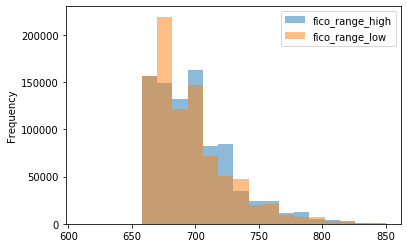

In [19]:
fico_columns = ['fico_range_high','fico_range_low']
print(loans_2007.shape[0])
loans_2007.dropna(subset=fico_columns,inplace=True)
print(loans_2007.shape[0])
loans_2007[fico_columns].plot.hist(alpha=0.5,bins=20);

In [20]:
loans_2007['fico_average'] = (loans_2007['fico_range_high'] + loans_2007['fico_range_low']) / 2


In [21]:
cols = ['fico_range_low','fico_range_high','fico_average']
loans_2007[cols].head()

,fico_range_low,fico_range_high,fico_average
0,735.0,739.0,737.0
1,740.0,744.0,742.0
2,735.0,739.0,737.0
3,690.0,694.0,692.0
4,695.0,699.0,697.0


In [22]:
drop_cols = ['fico_range_low','fico_range_high','last_fico_range_low', 'last_fico_range_high']
loans_2007 = loans_2007.drop(drop_cols, axis=1)
loans_2007.shape

(887382, 68)

In [23]:
preview[preview.name == 'loan_status']


,name,dtypes,first value,description
21,loan_status,object,Fully Paid,Current status of the loan


In [24]:
loans_2007["loan_status"].value_counts()


Current                                                591074
Fully Paid                                             223342
Charged Off                                             50171
Late (31-120 days)                                      11192
In Grace Period                                          6356
Late (16-30 days)                                        2084
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Default                                                   414
Name: loan_status, dtype: int64

In [25]:
meaning = [

"Loan is up to date on current payments.",
"Loan has been fully paid off.", 
"Loan for which there is no longer a reasonable expectation of further payments.",
"Loan hasn't been paid in 31 to 120 days (late on the current payment).",
"The loan is past due but still in the grace period of 15 days.",
"Loan hasn't been paid in 16 to 30 days (late on the current payment).",
"While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
"While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
"Loan is defaulted on and no payment has been made for more than 121 days."]
status, count = loans_2007["loan_status"].value_counts().index, loans_2007["loan_status"].value_counts().values
loan_statuses_explanation = pd.DataFrame({'Loan Status': status,'Count': count,'Meaning': meaning})[['Loan Status','Count','Meaning']]
loan_statuses_explanation

,Loan Status,Count,Meaning
0,Current,591074,Loan is up to date on current payments.
1,Fully Paid,223342,Loan has been fully paid off.
2,Charged Off,50171,Loan for which there is no longer a reasonable expectation of further payments.
3,Late (31-120 days),11192,Loan hasn't been paid in 31 to 120 days (late on the current payment).
4,In Grace Period,6356,The loan is past due but still in the grace period of 15 days.
5,Late (16-30 days),2084,Loan hasn't been paid in 16 to 30 days (late on the current payment).
6,Does not meet the credit policy. Status:Fully Paid,1988,"While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace."
7,Does not meet the credit policy. Status:Charged Off,761,"While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace."
8,Default,414,Loan is defaulted on and no payment has been made for more than 121 days.


In [26]:
loans_2007 = loans_2007[(loans_2007["loan_status"] == "Fully Paid") |
                        (loans_2007["loan_status"] == "Charged Off")|
                        (loans_2007["loan_status"] == "Default")  ]
mapping_dictionary = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0,"Default": 0}}
loans_2007 = loans_2007.replace(mapping_dictionary)
loans_2007.head()


,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_average
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,1,n,credit_card,Computer,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648.0,83.70%,9.0,f,NaN,Feb-16,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,737.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,0,n,car,bike,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687.0,9.40%,4.0,f,NaN,Sep-13,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,742.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,1,n,small_business,real estate business,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956.0,98.50%,10.0,f,NaN,Feb-16,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,737.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,1,n,other,personel,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598.0,21%,37.0,f,NaN,Jan-15,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,692.0
5,5000.0,36 months,156.46,A,3 years,RENT,36000.0,Source Verified,1,n,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0,Nov-04,3.0,9.0,0.0,7963.0,28.30%,12.0,f,NaN,Jan-16,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,732.0


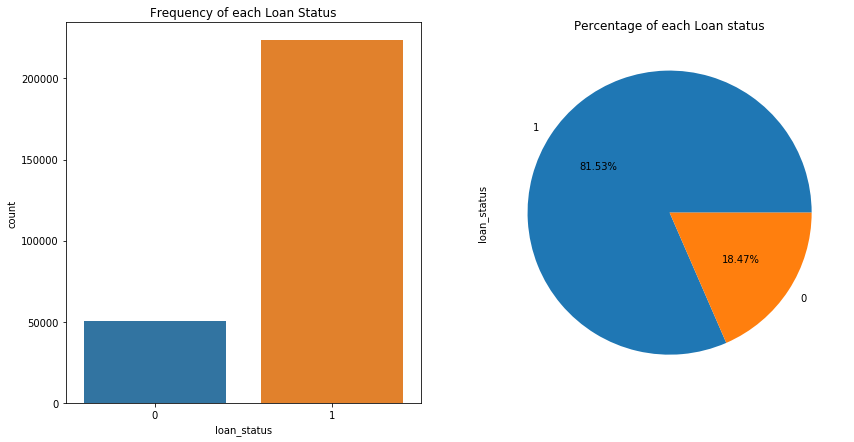

In [27]:
#Visualizing the Target Column Outcomes

fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=loans_2007,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
loans_2007.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()




In [28]:
loans_2007 = loans_2007.loc[:,loans_2007.apply(pd.Series.nunique) != 1]


In [29]:
for col in loans_2007.columns:
    if (len(loans_2007[col].unique()) < 4):
        print(loans_2007[col].value_counts())
        print()

 36 months    212444
 60 months     61483
Name: term, dtype: int64

Verified           100302
Not Verified        92304
Source Verified     81321
Name: verification_status, dtype: int64

1    223342
0     50585
Name: loan_status, dtype: int64

n    273926
y         1
Name: pymnt_plan, dtype: int64

f    193536
w     80391
Name: initial_list_status, dtype: int64

Mar-16    304
Apr-16    110
Name: next_pymnt_d, dtype: int64

INDIVIDUAL    273920
JOINT              7
Name: application_type, dtype: int64



In [30]:
print(loans_2007.shape[1])
loans_2007 = loans_2007.drop('pymnt_plan', axis=1)
print("We've been able to reduce the features to => {}".format(loans_2007.shape[1]))

67
We've been able to reduce the features to => 66


In [31]:
#loans_2007.to_csv("processed_data/filtered_loans_2007.csv",index=False)

filtered_loans = loans_2007
print(filtered_loans.shape)
filtered_loans.head()


(273927, 66)


,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_average
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,1,credit_card,Computer,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648.0,83.70%,9.0,f,NaN,Feb-16,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,737.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,0,car,bike,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687.0,9.40%,4.0,f,NaN,Sep-13,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,742.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,1,small_business,real estate business,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956.0,98.50%,10.0,f,NaN,Feb-16,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,737.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,1,other,personel,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598.0,21%,37.0,f,NaN,Jan-15,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,692.0
5,5000.0,36 months,156.46,A,3 years,RENT,36000.0,Source Verified,1,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0,Nov-04,3.0,9.0,0.0,7963.0,28.30%,12.0,f,NaN,Jan-16,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,732.0


In [32]:
null_counts = filtered_loans.isnull().sum()
#print("Number of null values in each column:\n{}".format(null_counts))

print(null_counts)

loan_amnt                         0
term                              0
installment                       0
grade                             0
emp_length                    10900
                              ...  
tot_hi_cred_lim               64026
total_bal_ex_mort             45010
total_bc_limit                45010
total_il_high_credit_limit    64026
fico_average                      0
Length: 66, dtype: int64


In [33]:
# Drop Columns that have more than 1% of the data set and dropna() the rest
data = filtered_loans.isna().sum()
index = filtered_loans.keys()

drop_col = []
count=0
ind = 1
for d in data:
    if(d != 0 and (d > len(filtered_loans) * .01)):
        print(str(ind) + ". " + str(index[count]) + "-       " + str(d))
        ind+=1
        drop_col.append(index[count])
    count+=1 
    
filtered_loans = filtered_loans.drop(drop_col, axis = 1)
filtered_loans = filtered_loans.dropna()
filtered_loans.describe()

1. emp_length-       10900
2. next_pymnt_d-       273513
3. tot_coll_amt-       64026
4. tot_cur_bal-       64026
5. total_rev_hi_lim-       64026
6. acc_open_past_24mths-       45010
7. avg_cur_bal-       64036
8. bc_open_to_buy-       47303
9. bc_util-       47451
10. mo_sin_old_il_acct-       70840
11. mo_sin_old_rev_tl_op-       64027
12. mo_sin_rcnt_rev_tl_op-       64027
13. mo_sin_rcnt_tl-       64026
14. mort_acc-       45010
15. mths_since_recent_bc-       47072
16. mths_since_recent_inq-       65372
17. num_accts_ever_120_pd-       64026
18. num_actv_bc_tl-       64026
19. num_actv_rev_tl-       64026
20. num_bc_sats-       53058
21. num_bc_tl-       64026
22. num_il_tl-       64026
23. num_op_rev_tl-       64026
24. num_rev_accts-       64026
25. num_rev_tl_bal_gt_0-       64026
26. num_sats-       53058
27. num_tl_120dpd_2m-       68659
28. num_tl_30dpd-       64026
29. num_tl_90g_dpd_24m-       64026
30. num_tl_op_past_12m-       64026
31. pct_tl_nvr_dlq-       64096
32. p

,loan_amnt,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,fico_average
count,272975.000000,272975.000000,2.729750e+05,272975.000000,272975.000000,272975.000000,272975.000000,272975.000000,272975.000000,2.729750e+05,272975.000000,272975.000000,272975.000000,272975.000000,272975.000000,272975.000000,272975.000000,272975.000000
mean,13644.652990,420.396719,7.269524e+04,0.815357,16.676922,0.254064,0.844883,10.996802,0.148120,1.527632e+04,25.107709,0.007198,0.003242,0.006854,9.218046,0.107105,0.023475,699.851488
std,8156.048136,245.606167,5.988586e+04,0.388009,7.827862,0.751374,1.062977,4.917866,0.445109,1.896575e+04,11.772274,0.091569,0.061431,0.095088,577.981219,0.332095,0.227480,32.049567
min,500.000000,16.080000,3.000000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,662.000000
25%,7500.000000,242.095000,4.500000e+04,1.000000,10.850000,0.000000,0.000000,8.000000,0.000000,5.904000e+03,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,677.000000
50%,12000.000000,366.820000,6.200000e+04,1.000000,16.320000,0.000000,1.000000,10.000000,0.000000,1.098100e+04,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,692.000000
75%,18500.000000,549.940000,8.700000e+04,1.000000,22.150000,0.000000,1.000000,14.000000,0.000000,1.916100e+04,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,717.000000
max,35000.000000,1424.570000,8.706582e+06,1.000000,59.180000,29.000000,8.000000,76.000000,15.000000,1.746716e+06,150.000000,6.000000,5.000000,7.000000,65000.000000,8.000000,15.000000,847.500000


In [34]:
print (drop_col) #emp_lenght is dropped 

['emp_length', 'next_pymnt_d', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit']


In [35]:
print("Data types and their frequency\n{}".format(filtered_loans.dtypes.value_counts()))


Data types and their frequency
float64    17
object     12
int64       1
dtype: int64


In [36]:
object_columns_df = filtered_loans.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])


term                     36 months
grade                            B
home_ownership                RENT
verification_status       Verified
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line            Jan-85
revol_util                  83.70%
initial_list_status              f
last_credit_pull_d          Feb-16
application_type        INDIVIDUAL
Name: 0, dtype: object


In [38]:
filtered_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272975 entries, 0 to 887379
Data columns (total 30 columns):
loan_amnt                     272975 non-null float64
term                          272975 non-null object
installment                   272975 non-null float64
grade                         272975 non-null object
home_ownership                272975 non-null object
annual_inc                    272975 non-null float64
verification_status           272975 non-null object
loan_status                   272975 non-null int64
purpose                       272975 non-null object
title                         272975 non-null object
addr_state                    272975 non-null object
dti                           272975 non-null float64
delinq_2yrs                   272975 non-null float64
earliest_cr_line              272975 non-null object
inq_last_6mths                272975 non-null float64
open_acc                      272975 non-null float64
pub_rec                       27297

In [39]:
filtered_loans['revol_util'] = filtered_loans['revol_util'].str.rstrip('%').astype('float')


In [41]:
#emp lenght already dropped cz very few values and application_type, initial_list_status added

cols = ['home_ownership', 'grade','verification_status', 'term', 'addr_state',
        'application_type','initial_list_status']  
for name in cols:
    print(name,':')
    print(object_columns_df[name].value_counts(),'\n')
    

home_ownership :
MORTGAGE    134741
RENT        114202
OWN          23852
OTHER          139
NONE            40
ANY              1
Name: home_ownership, dtype: int64 

grade :
B    81774
C    70899
A    44967
D    43911
E    20978
F     8337
G     2109
Name: grade, dtype: int64 

verification_status :
Verified           100204
Not Verified        91522
Source Verified     81249
Name: verification_status, dtype: int64 

term :
 36 months    211542
 60 months     61433
Name: term, dtype: int64 

addr_state :
CA    46320
NY    22932
TX    21028
FL    18930
NJ    10278
IL    10043
PA     9080
GA     8653
VA     8490
OH     8361
NC     7424
AZ     6603
MA     6566
MI     6504
MD     6440
WA     6380
CO     6083
MN     4800
MO     4249
NV     4153
CT     3913
OR     3606
AL     3377
WI     3344
LA     3172
IN     3122
SC     3074
TN     2715
KY     2433
OK     2338
UT     2261
KS     2236
AR     1918
HI     1592
NM     1504
WV     1242
NH     1238
RI     1171
DC      881
MT      792
AK      

In [42]:
for name in ['purpose','title']:
    print("Unique Values in column: {}\n".format(name))
    print(filtered_loans[name].value_counts(),'\n')

Unique Values in column: purpose

debt_consolidation    160720
credit_card            54566
home_improvement       16070
other                  15123
major_purchase          6644
small_business          4934
car                     3800
medical                 3006
moving                  2153
wedding                 1971
house                   1725
vacation                1678
educational              302
renewable_energy         283
Name: purpose, dtype: int64 

Unique Values in column: title

Debt consolidation         81718
Credit card refinancing    26049
Debt Consolidation         11515
Home improvement            7685
Other                       6828
                           ...  
The Favorite                   1
Lending Tree Refinance         1
drift boat loan                1
Bill consolidate loan          1
15k Loan consolidation         1
Name: title, Length: 48727, dtype: int64 



In [43]:
drop_cols = ['last_credit_pull_d','addr_state','title','earliest_cr_line']
filtered_loans = filtered_loans.drop(drop_cols,axis=1)
filtered_loans.head()


,loan_amnt,term,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,fico_average
0,5000.0,36 months,162.87,B,RENT,24000.0,Verified,1,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,737.0
1,2500.0,60 months,59.83,C,RENT,30000.0,Source Verified,0,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,742.0
2,2400.0,36 months,84.33,C,RENT,12252.0,Not Verified,1,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,737.0
3,10000.0,36 months,339.31,C,RENT,49200.0,Source Verified,1,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,692.0
5,5000.0,36 months,156.46,A,RENT,36000.0,Source Verified,1,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,f,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,732.0


In [44]:
mapping_dict = {
#"emp_length": {
#"10+ years": 10,
#"9 years": 9,
#"8 years": 8,
#"7 years": 7,
#"6 years": 6,
#"5 years": 5,
#"4 years": 4,
#"3 years": 3,
#"2 years": 2,
#"1 year": 1,
#"< 1 year": 0,
#"n/a": 0
#},
"grade":{
"A": 1,
"B": 2,
"C": 3,
"D": 4,
"E": 5,
"F": 6,
"G": 7
}
}
filtered_loans = filtered_loans.replace(mapping_dict)
filtered_loans[['grade','term','home_ownership','verification_status','purpose', 
                'initial_list_status','application_type']].head()

,grade,term,home_ownership,verification_status,purpose,initial_list_status,application_type
0,2,36 months,RENT,Verified,credit_card,f,INDIVIDUAL
1,3,60 months,RENT,Source Verified,car,f,INDIVIDUAL
2,3,36 months,RENT,Not Verified,small_business,f,INDIVIDUAL
3,3,36 months,RENT,Source Verified,other,f,INDIVIDUAL
5,1,36 months,RENT,Source Verified,wedding,f,INDIVIDUAL


In [45]:
nominal_columns = ["home_ownership", "verification_status", "purpose", "term",
                   'application_type','initial_list_status']
#nominal_columns = ["home_ownership", "verification_status", "purpose", "term"]
dummy_df = pd.get_dummies(filtered_loans[nominal_columns])
filtered_loans = pd.concat([filtered_loans, dummy_df], axis=1)
filtered_loans = filtered_loans.drop(nominal_columns, axis=1)

In [46]:
filtered_loans.head()


,loan_amnt,installment,grade,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,fico_average,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_f,initial_list_status_w
0,5000.0,162.87,2,24000.0,1,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,0.0,0.0,0.0,0.0,737.0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
1,2500.0,59.83,3,30000.0,0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,742.0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
2,2400.0,84.33,3,12252.0,1,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,0.0,0.0,0.0,0.0,737.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0
3,10000.0,339.31,3,49200.0,1,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,692.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0
5,5000.0,156.46,1,36000.0,1,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,0.0,0.0,0.0,0.0,0.0,0.0,732.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0


In [47]:
filtered_loans.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 272975 entries, 0 to 887379
Data columns (total 49 columns):
loan_amnt                              272975 non-null float64
installment                            272975 non-null float64
grade                                  272975 non-null int64
annual_inc                             272975 non-null float64
loan_status                            272975 non-null int64
dti                                    272975 non-null float64
delinq_2yrs                            272975 non-null float64
inq_last_6mths                         272975 non-null float64
open_acc                               272975 non-null float64
pub_rec                                272975 non-null float64
revol_bal                              272975 non-null float64
revol_util                             272975 non-null float64
total_acc                              272975 non-null float64
collections_12_mths_ex_med             272975 non-null float64
acc_now_del

# AdaBoost 

In [ ]:
# Split into x and y variables
df_predictor= filtered_loans.iloc[:, filtered_loans.columns != 'loan_status']
df_target= filtered_loans.iloc[:, filtered_loans.columns == 'loan_status']

In [50]:
# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_predictor, df_target, 
                                                    test_size=0.3, random_state=0)
print("x_train ",X_train.shape)
print("x_test ",X_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)


x_train  (191082, 48)
x_test  (81893, 48)
y_train  (191082, 1)
y_test  (81893, 1)


In [52]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

X_train_scaled.columns = X_train.columns.values
X_test_scaled.columns = X_test.columns.values
X_train_scaled.index = X_train.index.values
X_test_scaled.index = X_test.index.values 

X_train = X_train_scaled
X_test = X_test_scaled
X_train.describe()


,loan_amnt,installment,grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,fico_average,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_f,initial_list_status_w
count,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,191082.0,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05,1.910820e+05
mean,-1.342663e-16,7.028211e-17,-1.963349e-15,6.742931e-17,-1.790992e-18,-3.643501e-15,-7.976219e-16,-8.311183e-16,-7.280333e-15,-4.032622e-17,-2.408557e-17,5.111743e-16,-1.575236e-15,4.540074e-15,2.846337e-15,2.703699e-15,4.740298e-15,-2.841276e-15,5.007142e-16,0.0,-2.951035e-15,-2.154045e-15,-1.680262e-15,2.971163e-16,1.672268e-15,-4.558224e-15,3.754688e-15,-6.478781e-15,-4.134557e-15,2.757147e-15,2.501934e-15,-2.637174e-15,-3.132047e-15,3.162325e-15,-4.322686e-15,-2.239785e-15,-6.831316e-15,5.737945e-15,6.831130e-16,-2.241266e-15,3.727332e-15,3.139361e-15,7.313277e-16,-7.313277e-16,-8.402133e-16,8.402132e-16,-1.290560e-16,1.290560e-16
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,0.0,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.612979e+00,-1.647576e+00,-1.350248e+00,-1.176213e+00,-2.130369e+00,-3.384282e-01,-7.929425e-01,-2.034637e+00,-3.314460e-01,-8.173855e-01,-2.201902e+00,-1.961459e+00,-7.851799e-02,-5.306513e-02,-7.263195e-02,-1.625393e-02,-3.230860e-01,-1.020058e-01,-1.180592e+00,0.0,-9.873525e-01,-1.253097e-02,-2.276776e-02,-3.099390e-01,-8.475540e-01,-7.106317e-01,-6.507193e-01,-7.613970e-01,-1.187027e-01,-5.018604e-01,-1.194671e+00,-3.293143e-02,-2.504237e-01,-7.896155e-02,-1.581046e-01,-1.040610e-01,-8.880069e-02,-2.420434e-01,-3.293143e-02,-1.355388e-01,-7.808441e-02,-8.494800e-02,-1.856296e+00,-5.387072e-01,-2.523747e+02,-3.962362e-03,-1.546962e+00,-6.464282e-01
25%,-7.539991e-01,-7.260200e-01,-6.023120e-01,-4.676981e-01,-7.427942e-01,-3.384282e-01,-7.929425e-01,-6.099861e-01,-3.314460e-01,-5.010955e-01,-7.258705e-01,-7.729527e-01,-7.851799e-02,-5.306513e-02,-7.263195e-02,-1.625393e-02,-3.230860e-01,-1.020058e-01,-7.132372e-01,0.0,-9.873525e-01,-1.253097e-02,-2.276776e-02,-3.099390e-01,-8.475540e-01,-7.106317e-01,-6.507193e-01,-7.613970e-01,-1.187027e-01,-5.018604e-01,-1.194671e+00,-3.293143e-02,-2.504237e-01,-7.896155e-02,-1.581046e-01,-1.040610e-01,-8.880069e-02,-2.420434e-01,-3.293143e-02,-1.355388e-01,-7.808441e-02,-8.494800e-02,5.38

In [53]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

AdaBoost = AdaBoostClassifier(n_estimators=100, 
                              base_estimator=DecisionTreeClassifier(max_depth=1),
                              random_state=0)

model_AB=AdaBoost.fit(X_train,y_train)

model_AB=AdaBoost.fit(X_test,y_test)


/Users/hrutubanginwar/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hrutubanginwar/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
# train accuracy
acc_adaboost = round(AdaBoost.score(X_train, y_train) * 100, 2)
print("Model accuracy in the training sample is: ", acc_adaboost, "%")


# test accuracy (trial)
acc_adaboost = round(AdaBoost.score(X_test, y_test) * 100, 2)
print("Model accuracy in the testing sample is: ", acc_adaboost, "%")



Model accuracy in the training sample is:  81.66 %
Model accuracy in the testing sample is:  81.42 %


In [56]:
from sklearn.metrics import classification_report
y_pred_AB =model_AB.predict(X_test)
print(classification_report(y_test,y_pred_AB))


              precision    recall  f1-score   support

           0       0.53      0.04      0.07     15278
           1       0.82      0.99      0.90     66615

    accuracy                           0.81     81893
   macro avg       0.67      0.52      0.49     81893
weighted avg       0.76      0.81      0.74     81893



NameError: name 'y_test' is not defined